In [39]:
import warnings 
warnings.filterwarnings('ignore')

In [128]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score;
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [161]:
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [162]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [164]:
df.shape

(5000, 14)

In [165]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [166]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [167]:
# removing id and zipcode as not required by model

In [168]:
df = df.drop(['ID','ZIP Code'],axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [169]:
df.shape

(5000, 12)

In [170]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [171]:
df.groupby('Personal Loan').count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


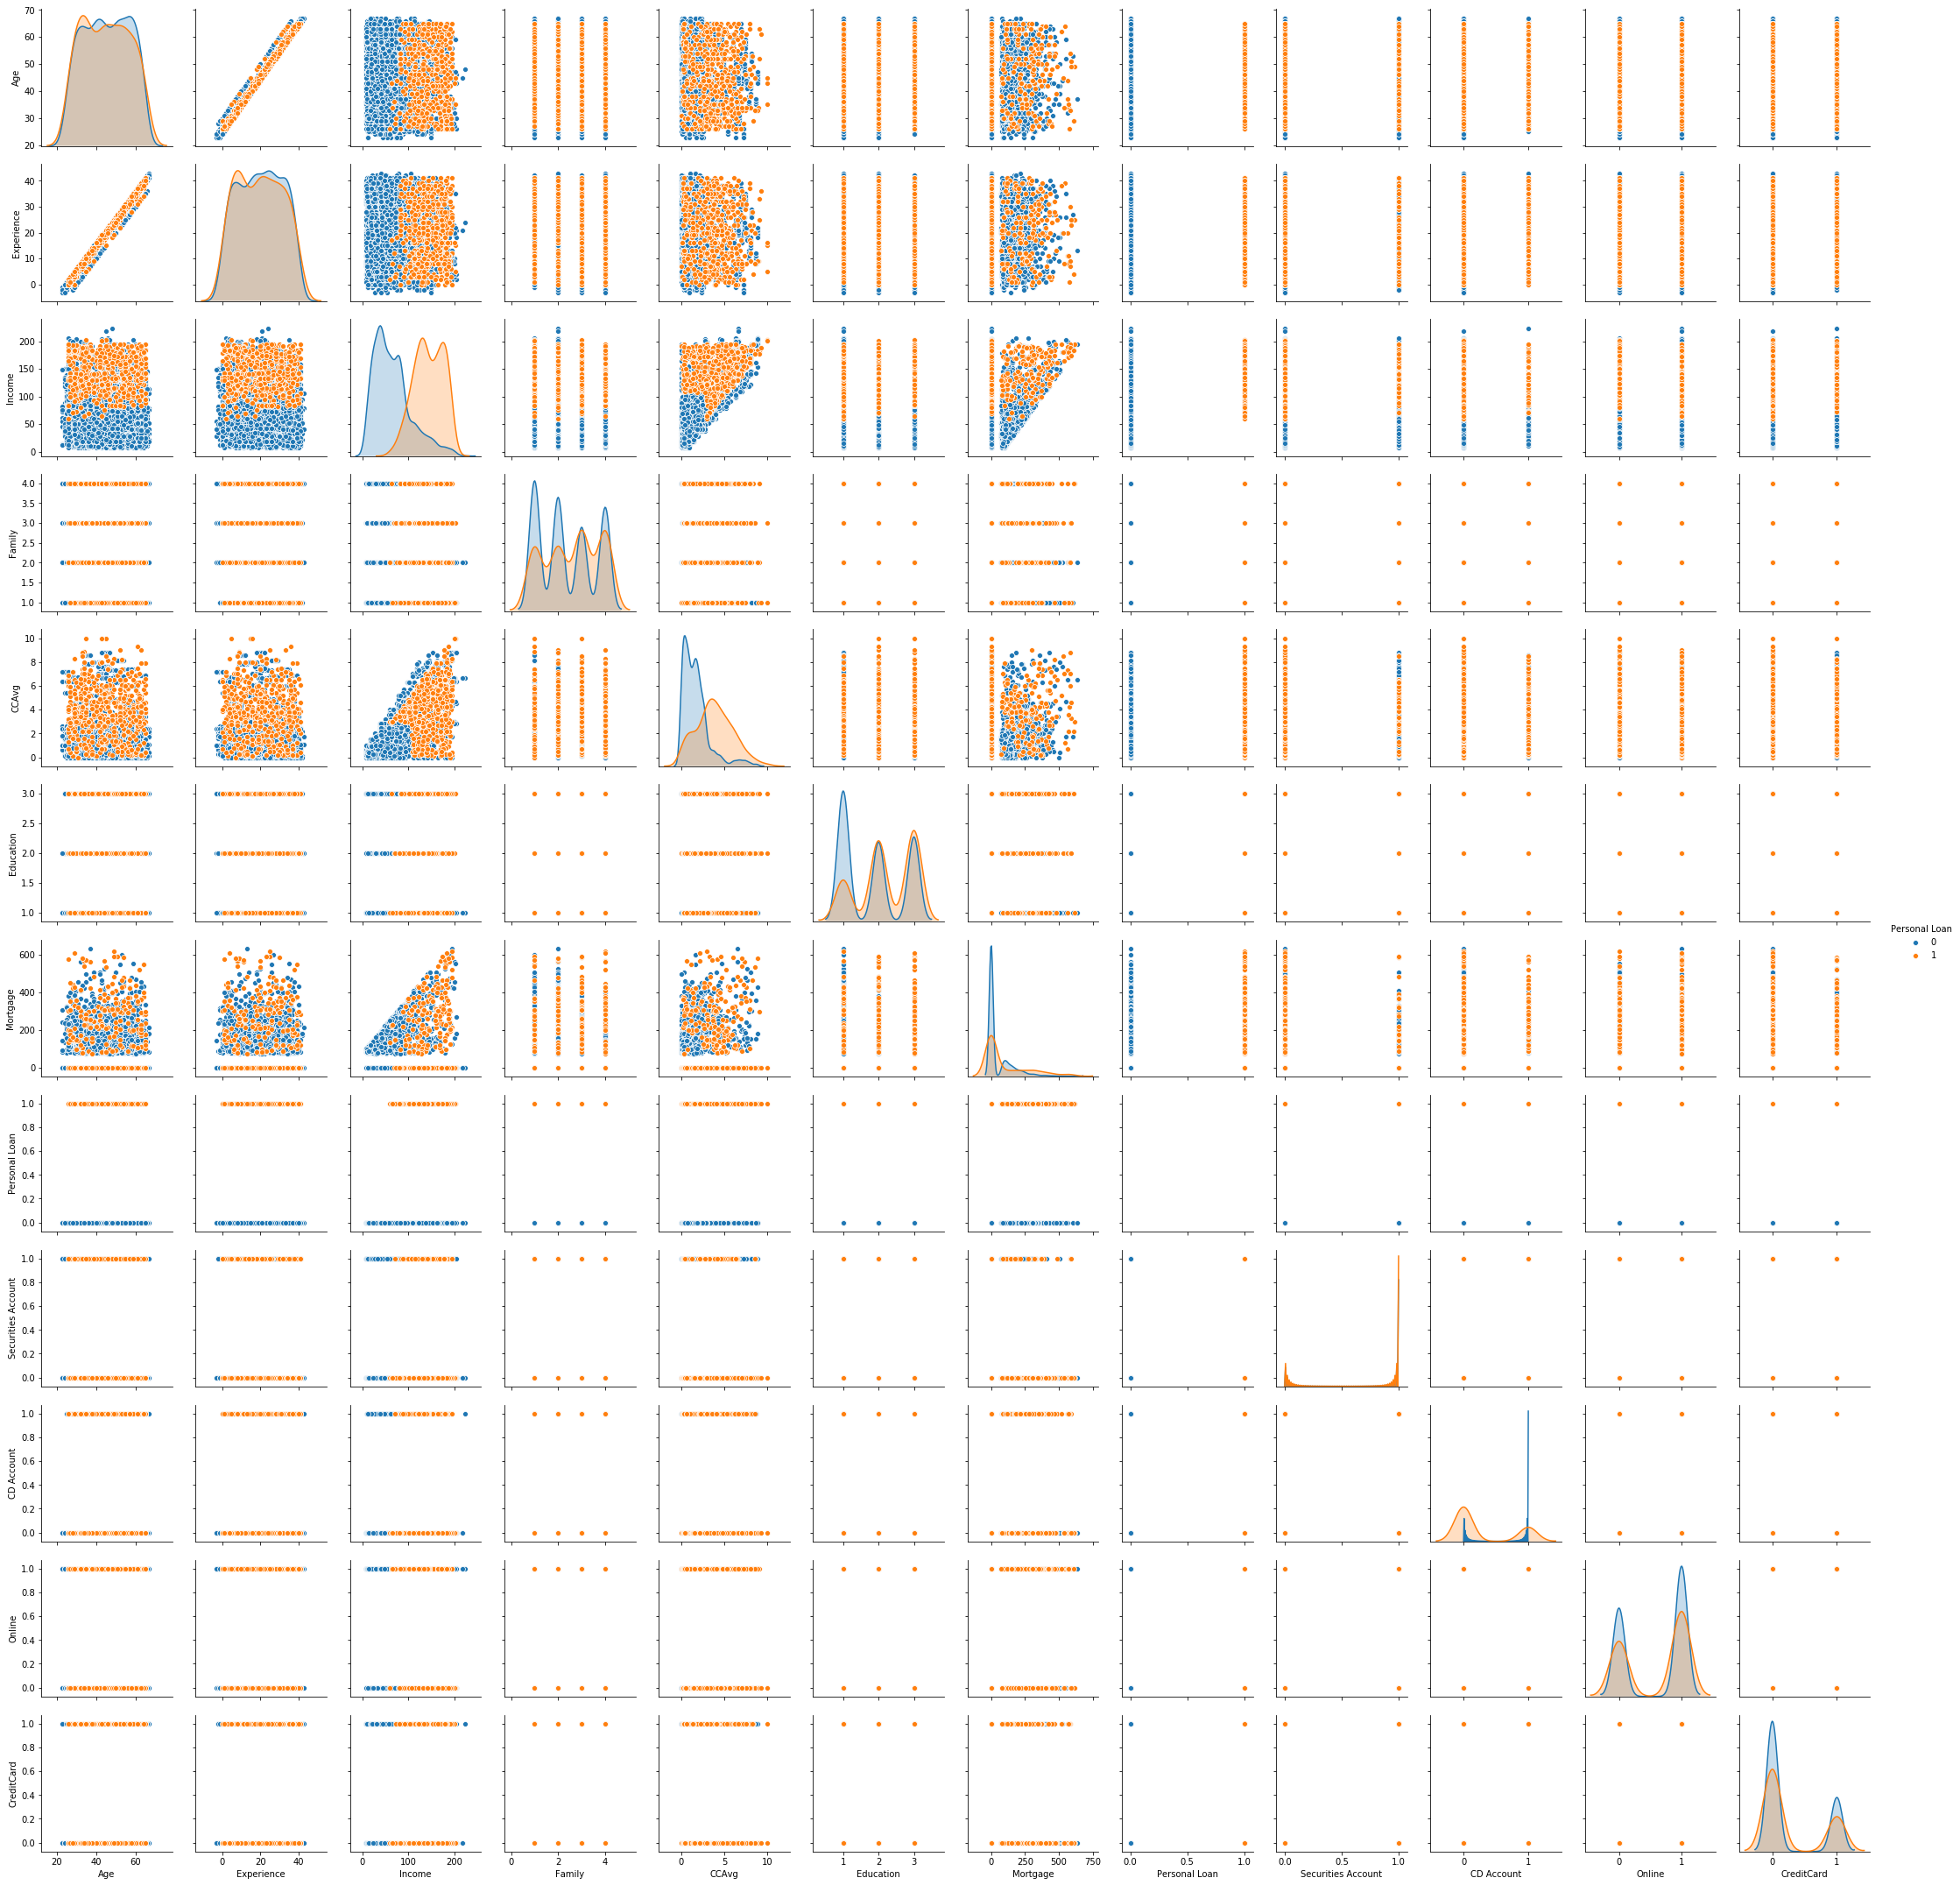

In [172]:
sns.pairplot(df,hue='Personal Loan')

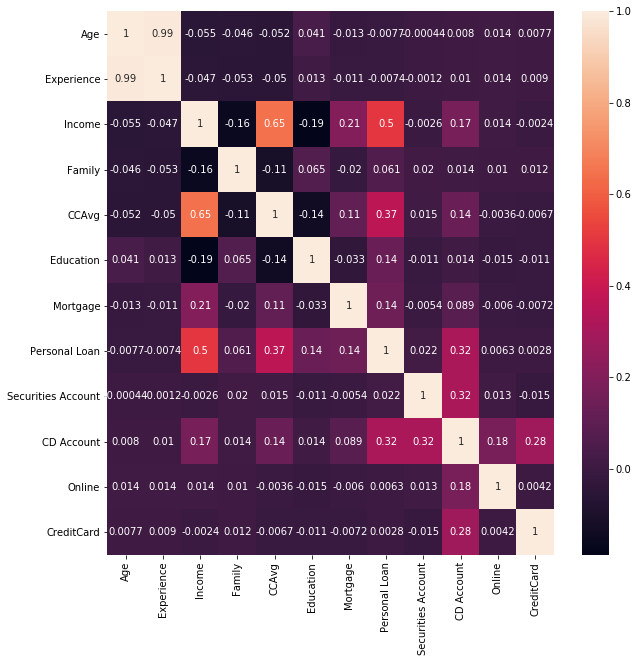

In [173]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True)

Observations after reading the pairplot:

age and experience features seems to be highly correated with each other.

distribution of age and experience seems to be overlapped for both classes of independent variable. so this seems that both features will not provide information in prediction independent variable. 

hence we can drop either age or experience feature.

Income and CCAvg seems to be strong feature in predicting independent variable.

Rest all features are not strong predictors.
same can be confirmed using heatmap.

In [174]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


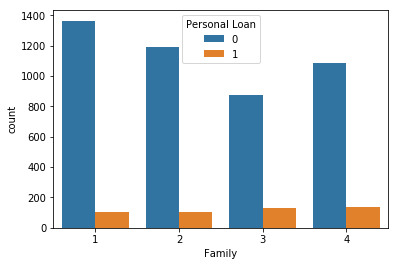

In [175]:
sns.countplot(x='Family',data=df,hue="Personal Loan")

Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 or 4 are more likely to take loan. When considering future campaign this might be taken into account

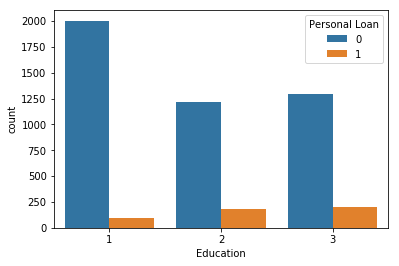

In [176]:
sns.countplot(x='Education',data=df,hue="Personal Loan")

It shows that people who are grad and professional are more likely to opt for personal loan as compared to undergrad

In [177]:
# this the list of true features which will contribute in predicting the dependent variable. 
# Here i am taking those features which are 15% or above correlated with dependent variable.
df_corr = df.corr().abs()
df_corr = df_corr[df_corr['Personal Loan']>0.15].index.tolist()
df_corr

['Income', 'CCAvg', 'Personal Loan', 'CD Account']

In [178]:
df_copy = df[df_corr]
df_copy.head()

,Income,CCAvg,Personal Loan,CD Account
0,49,1.6,0,0
1,34,1.5,0,0
2,11,1.0,0,0
3,100,2.7,0,0
4,45,1.0,0,0


In [179]:
df_copy_X = df_copy.drop(['Personal Loan'],axis=1)
df_copy_y = df_copy['Personal Loan']
df_copy_X.head()
# df_copy_y.head()

,Income,CCAvg,CD Account
0,49,1.6,0
1,34,1.5,0
2,11,1.0,0
3,100,2.7,0
4,45,1.0,0


In [417]:
X_train, X_test, y_train, y_test = train_test_split(df_copy_X, df_copy_y, test_size=0.30, random_state=10)

In [418]:
# Since it`s knnis distance based we will use scalar
sc = StandardScaler()
sc.fit(X_train)
X_train_scaler = sc.transform(X_train)
X_test_scaler = sc.transform(X_test)

# Logistic Regression Classifier

In [419]:
lr = LogisticRegression()
lr.fit(X_train_scaler, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [420]:
print(lr.coef_)
print(lr.intercept_)

[[1.63776083 0.08169106 0.5185583 ]]
[-3.49976489]


In [421]:
y_pred = lr.predict(X_test_scaler)

In [422]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
lr_confusion_matrix

array([[1308,   52],
       [  80,   60]], dtype=int64)

In [423]:
lr_accuracy_score = accuracy_score(y_test,y_pred)
lr_accuracy_score

0.912

In [424]:
lr_f1_score = f1_score(y_test,y_pred)
lr_f1_score

0.47619047619047616

# KNN

In [425]:
k_range = np.arange(1,31)
accuracy_score_list=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaler,y_train)
    y_predict = knn.predict(X_test_scaler)
    accuracy_score_list.append(accuracy_score(y_test,y_predict))
#without scaler below    
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train,y_train)
#     y_predict = knn.predict(X_test)
#     accuracy_score_list.append(accuracy_score(y_test,y_predict))
    
print("Maximum Accuracy:",np.max(accuracy_score_list))
print("Optimal k value:",k_range[accuracy_score_list.index(np.max(accuracy_score_list))])

Maximum Accuracy: 0.9246666666666666
Optimal k value: 4


In [426]:
# considering the above k value
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaler,y_train)  
y_predict = knn.predict(X_test_scaler)
KNN_Matrix = pd.DataFrame(confusion_matrix(y_test, y_predict))
print("KNN_Matrix:")
print(KNN_Matrix)
KNN_f1_score = f1_score(y_test, y_predict)
print("KNN_f1_score:",KNN_f1_score)

KNN_Matrix:
      0   1
0  1329  31
1    82  58
KNN_f1_score: 0.5065502183406114


# Naive Bayes

In [427]:
nb = GaussianNB()
nb.fit(X_train_scaler,y_train)
y_pred = nb.predict(X_test_scaler)
print("Accuracy", accuracy_score(y_test,y_pred))
Naive_Matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
Naive_F1_score = f1_score(y_test, y_pred)
print('Naive_matrix:')
print(Naive_Matrix)
print('Naive_f1_score:',Naive_F1_score)

Accuracy 0.8753333333333333
Naive_matrix:
      0    1
0  1230  130
1    57   83
Naive_f1_score: 0.4702549575070822


In [428]:
# f1 scores
print(KNN_f1_score)
print(lr_f1_score)
print(Naive_F1_score)

0.5065502183406114
0.47619047619047616
0.4702549575070822


In [429]:
# Confusion Matrices
print(KNN_Matrix)
print(lr_confusion_matrix)
print(Naive_Matrix)

      0   1
0  1329  31
1    82  58
[[1308   52]
 [  80   60]]
      0    1
0  1230  130
1    57   83


As per above confusion matrices and f1 scores KNN performs better than other algorithms